# Project 1

Pretend that you've been hired as a data science consultant by a public health company to do some data analyses on a [diabetes dataset](https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/diabetes2.csv). They ask you two questions:

### Question 1. Can BMI be predicted using all the other variables in the dataset? What are the relationships between our predictor variables and BMI? Which variable has the largest effect on BMI? Will this model accurately predict BMI in other similar datasets?

### Question 2. Can Diabetes (measured in the `Outcome` column, 0 indicates no diabetes, 1 indicates diabetes diagnosis) be predicted using all the other variables in the dataset? What are the relationships between our predictor variables and diabetes? Which variable has the largest effect on Diabetes diagnosis? Will this model accurately predict Diabetes in other similar datasets?

They've asked you to do some analyses and make a write up for these questions. Use code AND markdown cells to create a write up that answers the two questions above. Your write up should be something you could show you "clients" to answer their questions, like a report to present. Your write up for *each* question should include:

- a) The code for your model(s)
- b) A short explanation of why you chose each model
- c) Interpretations of the coefficents for each model<sup>1</sup>
- d) Explicit answers to each part of the Question asked by the public health company
- e) Written justifications for choices made (such as which variables to z-score, method of model validation...etc)
- f) A clear and concise interpretation of how well each of your models performed, and justification for which metrics you used to determine that
- g) Visualizations using ggplot (minimum 2 *per* question, but as many as needed) that help communicate the answers you give.

DO NOT answer any of these questions using code comments, written parts of the write up must be in markdown. Pretend that you are creating these write-ups be read by people who are NOT data scientists/statisticians, therefore try to communicate your points/justifications/answers clearly and address them to an audience who does not know a lot about data science. Get rid of superflous code, and make the reports consise, complete, and clean!

You will be graded on:
- the appropriateness of your modeling/visualization choices and their justifications,
- the clarity and effectiveness of your answers, visualizations and explanations, and
- the completeness/elegance of your analyses


<sup>1</sup>(if you use KFold or LOO, then for each predictor variable (and intercept) take the average coefficient value across all the models you made OR once you've looked at the average test set error from the cross validation, refit your model using ALL the data and grab the coefficients from that model.)

In [52]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.linear_model import LogisticRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score #model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix #model evaluation

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

%matplotlib inline

## Question 1

In [53]:
d = pd.read_csv("/Users/willstrauss/Documents/CPSC_Courses/CPSC_392/Data/diabetes.csv")

#removing BMI's with the value 0. 
zero_vals = d[(d['BMI'] == 0)].index 
d.drop(zero_vals, inplace = True) 

#removing Glucose with the value 0. 
zero_vals = d[(d['Glucose'] == 0)].index 
d.drop(zero_vals, inplace = True) 

d.head()
#it is impossible to have a BMI or Glucose level of 0 so they data could throw off our model.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Average BMI: 32.45465425531915


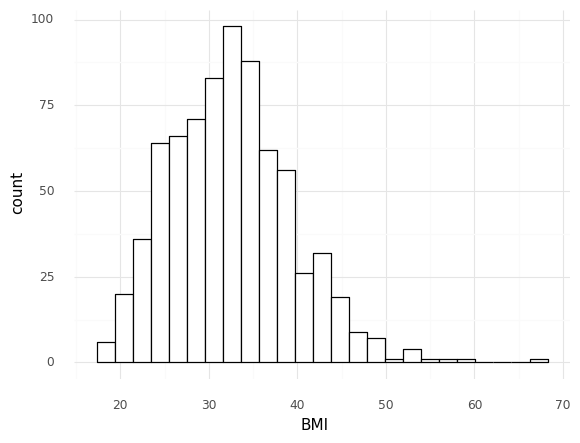

<ggplot: (8790272390548)>

In [54]:
print("Average BMI:", np.mean(d["BMI"]))

#plot BMI
(ggplot(d, aes("BMI")) + geom_histogram(color = "black", fill = "white") + theme_minimal()) #plot price data

In [55]:
#split test and training data
predictors = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "DiabetesPedigreeFunction", "Age", "Outcome"]
continuous = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "DiabetesPedigreeFunction", "Age"]
x_train, x_test, y_train, y_test = train_test_split(d[predictors], d["BMI"], test_size = 0.2) 

zScore = StandardScaler()
zScore.fit(x_train[continuous])
zScore.transform(x_train[continuous]) 

LR_Model = LinearRegression()
LR_Model.fit(x_train, y_train) #fit to dataset


LinearRegression()

In [56]:
#using the testing data predict what the outcome would be
y_pred = LR_Model.predict(x_test) 

#creating a dataframe with preicted and true values 
true_vs_pred = pd.DataFrame({"predictced values": y_pred, "true values": y_test })

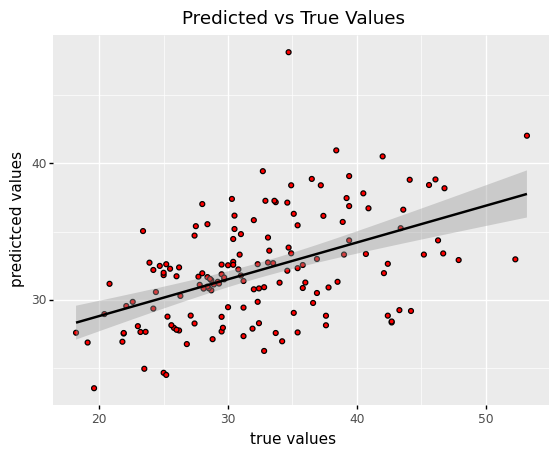

<ggplot: (8790272576744)>


In [57]:
#graphing true values vs predicted values
print(ggplot(true_vs_pred, aes(x = "true values", y = "predictced values")) + 
      geom_point(color = "black", fill = "red") + 
      geom_smooth(method = "lm") +
      ggtitle("Predicted vs True Values"))

Values predicted by the Linear Regression model plotted against the true values

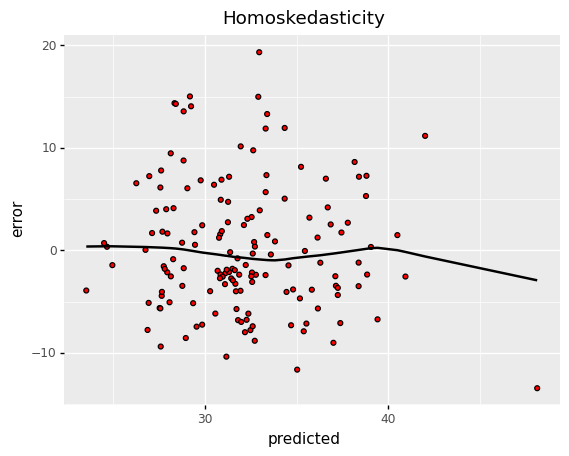

<ggplot: (8790271813373)>


In [62]:
#checking homoscedasticity 
assump = pd.DataFrame({"error": y_test - y_pred, "predicted": y_pred})
print(ggplot(assump, aes(x = "predicted", y = "error")) + 
      geom_point(color = "black", fill = "red") + 
      geom_smooth() +
      ggtitle("Homoskedasticity"))

The homoscedasticity (or average error), of the predicted data points.

In [59]:
#getting coefficients
coefficients = pd.DataFrame({"Coef": LR_Model.coef_, "Name": predictors})
coefficients = coefficients.append({"Coef": LR_Model.coef_, "Name": "Intercept"}, ignore_index = True)
coefficients

,Coef,Name
0,0.00932954,Pregnancies
1,0.0211002,Glucose
2,0.0466107,BloodPressure
3,0.160597,SkinThickness
4,-0.00392551,Insulin
5,0.800229,DiabetesPedigreeFunction
6,-0.04072,Age
7,3.6245,Outcome
8,"[0.009329539030638843, 0.02110020181531203, 0....",Intercept


In [60]:
#r2 of test and training data
print("Training data r2:", LR_Model.score(x_train, y_train))
print("Testing data r2:", LR_Model.score(x_test, y_test))
print("Mean Squared Error:", mean_squared_error(y_test, LR_Model.predict(x_test)))

Training data r2: 0.253075186099472
Testing data r2: 0.23050301041000243
Mean Squared Error: 38.557848914450894


# Question 1 Answers:

b) I chose linear regression because the variable we are predicting is continuous variables. 

c) Outcome (whether a person has diabetes) has the strongest positive relationship to BMI. When a person has diabetes, BMI increases by 3.6. The strongest negative relationship to BMI is age. For every year a person is older, their BMI goes down by 0.04. Other strong positive relationships are Skin thickness, Blood Pressure, Glucose, and Diabetes Pedigree Function. The weakest relationship is age, this means that age is a poor predictor of BMI.

d) "Can BMI be predicted using all the variables in the data set?" Not very well. The r2 is around 0.25 meaning that only about 25% of the predicted data is accurate to the actual data.

"Which variable has the largest effect on BMI?" Diabetes (Outcome) has the largest effect by far. When a person has diabetes, BMI increases by 3.6. 

"Will the model accuratley predict BMI in other similar datasets?" No. The difference between the r2 values in the testing and training data is very small. This means that the model is not over/under fit. What that means is that the model predicts new data about as well as it does the data it was trained on. Since it is equally bad at predicting both new data, and the training data, it will not be a good predictor of any other, new data.

e) I removed 0 values from Glucose and BMI. I removed the values from BMI because it is impossible to have a BMI of 0, and it would throw off the predictions if the model was trained with 0 as a part of its testing data. I decided to only remove 0 values from Glucose because it had a small number of them. The other variables which had 0 values (such as skin thickness and insulin) had around half of their values as 0. Removing these would have required me to remove the majority of the data, which would have likley caused a less accurate result than just leaving those 0 values in. I zScored the continuous variables before fitting the model to make sure the model was more accurate and there was no data leakage. I did not zScore outcome as it is a continuois variable and it could have thrown off the results. I stuck with a train test split, linear regression model because it is accurate, and simple. It makes it much easier to visualize the data with graphs such as the ones I made above. 

f) The r2 is around 0.2-0.25, meaning that the model is only about 20-25% accuarte. This is not very good. I used r2 because it is the most simple indicator of how well a model preformed. Furthermore, I plotted the true values and the predicted values. This shows how close the true/predicted values are to each other in the form of a linear relationship. The linear relationship is fairly weak is very weak as seen on the graph above. I wanted to see if the model was good at predicting BMI in any range. For example, maybe it was better at predicting higher BMIs than lower ones. So I plotted homoskedasticity. The rule of homoskedasticity (Where a model should predict with the same accuracy accross all predicted values of BMI) is not violated. This means that the model predicts very innacurately accross all values of BMI. Finally, the Mean Squared Error (average squared error of the model) is very high at 33.2. Overall, the model preformed poorly. It is not a good predictor of BMI.

## Question 2

In [22]:
#new dataframe original BMI data
d2 = pd.read_csv("/Users/willstrauss/Documents/CPSC_Courses/CPSC_392/Data/diabetes.csv")

predictors2 = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI","DiabetesPedigreeFunction", "Age"]

kf = KFold(n_splits = 10)

X = d2[predictors2]
y = d2["Outcome"]

lr = LogisticRegression()

train_acc = []
test_acc = []

In [23]:
for train_indecies, test_indecies in kf.split(X):
    x_train = X.iloc[train_indecies]
    x_test = X.iloc[test_indecies]
    y_train = y[train_indecies]
    y_test = y[test_indecies]
    
    #zscore
    zScore.fit(x_train)

    xz_train = zScore.transform(x_train)
    xz_test = zScore.transform(x_test)
    
    #model
    model = lr.fit(xz_train, y_train)
    
    #record accuracy
    train_acc.append(accuracy_score(y_train, model.predict(xz_train)))
    test_acc.append(accuracy_score(y_test, model.predict(xz_test)))

In [24]:
print(np.mean(train_acc))
print(np.mean(test_acc))

0.7803809089616288
0.7799555707450445


In [25]:
coef = pd.DataFrame({"Odds Coef": np.exp(model.coef_[0]),"Log Odds Coef": model.coef_[0], "Name": predictors2})
coef = coef.append({"Odds Coef": np.exp(model.intercept_[0]),"Log Odds Coef": model.intercept_[0], "Name": "Intercept"}, ignore_index = True)
coef

,Odds Coef,Log Odds Coef,Name
0,1.561162,0.445430,Pregnancies
1,2.920357,1.071706,Glucose
2,0.771913,-0.258883,BloodPressure
3,1.014608,0.014502,SkinThickness
4,0.880471,-0.127298,Insulin
5,2.140684,0.761125,BMI
6,1.392855,0.331356,DiabetesPedigreeFunction
7,1.125388,0.118128,Age
8,0.404140,-0.905994,Intercept


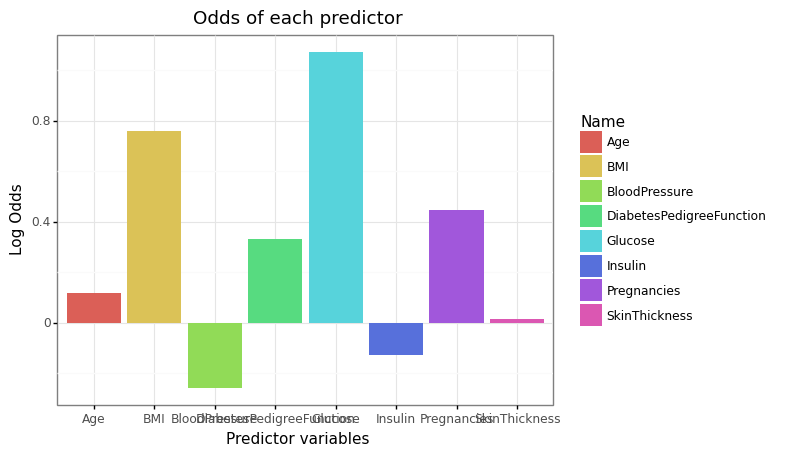

<ggplot: (8790272029627)>


In [26]:
#visualization of coefficients
coef2 = coef.drop(coef.index[[6, 8]], axis = 0)
coef3 = coef.drop(coef.index[8], axis = 0)

print((ggplot(coef3, aes(x = "Name", y = "Log Odds Coef", fill = "Name")) + 
       stat_summary(geom = "bar") + 
       ggtitle("Odds of each predictor") + 
       xlab("Predictor variables") +
       ylab("Log Odds") +
       theme_bw()))

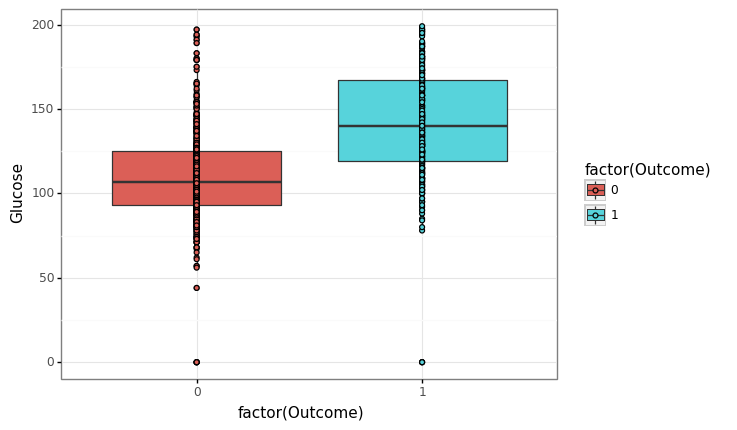

<ggplot: (8790271825863)>

In [27]:
#visualization of glucose vs outcome
(ggplot(d2, aes(x = "factor(Outcome)", y = "Glucose", fill = "factor(Outcome)")) + 
       geom_boxplot() +
       geom_point() +
       theme_bw())

# Question 2 Answers:

b) I chose a logictic regression model because we are predicting a categorical variable.

c) Most of the coefficients have a strong positive relationship with Diabetes (Ouctome). The strongest relationship is with Glucose. For every unit of increase in glucose, your odds of having diabetes go up almost 3-1, and your log odds go up by 1.07. Insulin and Blood Pressure have negative correlations with Diabetes. For every unit of increase in insulin and blood pressure, your odds of having diabetes decrease by 0.8-1 and 0.7-1 respecitivley. Pregnancnies and BMI also have very strong relationships with diabetes. For every unit of increase in BMI your odds of having diabetes go up over 2-1. For every pregnancy your odds go up around 1.5-1. The weakest relationship to diabetes is skin thickness. With odds of about 1-1 and a log odds of close to 0, it has almost no effect determining whether a person will have diabetes. In the graphs above, you can see the effect of each of the predictor variables on diabetes. You can also see that the people who have diabetes have, on average, significantly higher glucose levels than those who do not.

d) "Can Diabetes (Outcome) be predicted using all the variables in the data set?" Yes. It can be predicted very well. The model has an accuracy score (The amount of times the model predicts the correct value) of 78%. 78% of the time it predicts the correct value.

"What are the relationships between our predictor variables and diabetes? Which variable has the largest effect on Diabetes diagnosis?" The relationship between most of the predictor variables and diabetes is very high. Some of the predictor variables increase your chances of having diabetes by over 2-1 for every unit of increase. Overall they have mostly solid, positive relationships, with a few negative ones. Glucose is by far the strongest predictor of BMI.

"Will this model accurately predict Diabetes in other similar datasets?" Yes, the accuracy score for the training and testing data is almost identical. This means that the model is not overfit/underfit, so the model works as well with new testing data as it does with the data it was trained on.

e) I decided to zScore all of the variables, as they are all continuous. I did this to each of the data sets in the KFold split, before fitting the model to avoid data leakage. I used KFold cross-validation in order to make this model as accurate as possible. I wanted to use cross validation to make this as accurate as it could be but chose not to use Leave One Out due to the computational power it takes, especially with this many data points. 

f) This model performed very well. It had an accuracy score of 0.78, meaning that it was correct 78% of the time. I use accuracy score because it is by far the best way to judge the success of a logistic regression model. It tells you simply how many times the model was right out of all the predictions it made. 

